# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Import dependencies
import requests
from api_keys import weather_api_key
import pprint
import random
import json
import pandas as pd
import numpy as np
import csv
from scipy import stats
import matplotlib.pyplot as plt
import kdtree
import os
from citipy import citipy

## Generate Cities List

In [2]:
# Generate city list

Cities_req = 600 # Define the number of cities to be randomly picked for analysis

cities_list = ['Not_A_Valid_City'] # Start a list to store city with an arbitary first data to be removed later

factor = 1*(10**12)

while len(cities_list) < Cities_req + 1: #statement to loop until the number of cities in the cities_list reaches the target number

    lat = random.randrange(-90*factor,90*factor)/factor
    lng = random.randrange(-180*factor,180*factor)/factor
    ncity = citipy.nearest_city(lat,lng)

    try:
        cities_list.index(ncity.city_name)>0 # Check if they selected city is already in the list, if already in the list then do nothing
        
    except ValueError: # If it is not in the list it'll return a ValueError and add it to the list
        cities_list.append(ncity.city_name) # Add city to the list

cities_list.remove('Not_A_Valid_City') # Remove arbitary previously included

len(pd.DataFrame({"City":cities_list})["City"].unique())

600

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
city_name =[]
latitude = []
longtitude = []
temperature = []
temp_max=[]
humidity = []
cloudiness = []
wind_speed  = []
timezone = []
country = []

counter = 0

baseurl = "http://api.openweathermap.org/data/2.5/weather?" + "appid=" + weather_api_key + "&units=imperial" + "&q="

print("Beginning Data Retrieval")
print("-----------------------------")



for city in cities_list:

    counter = counter + 1
    print(f"Processing Record {counter} of {Cities_req} | {city} ")
    
    try:
        city_response = requests.get(baseurl + city).json()
        city_name.append(city_response['name'])
        latitude.append(city_response['coord']['lat'])
        longtitude.append(city_response['coord']['lon'])
        temperature.append(city_response['main']['temp'])
        temp_max.append(city_response['main']['temp_max'])
        humidity.append(city_response['main']['humidity'])
        cloudiness.append(city_response['clouds']['all'])
        wind_speed.append(city_response['wind']['speed'])
        country.append(city_response['sys']['country'])
        timezone.append(city_response['timezone'])
    except KeyError:
        print(f"{city} cannot be found in open weathermap")
        pass
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")


Beginning Data Retrieval
-----------------------------
Processing Record 1 of 600 | fayetteville 
Processing Record 2 of 600 | rikitea 
Processing Record 3 of 600 | tasiilaq 
Processing Record 4 of 600 | seymchan 
Processing Record 5 of 600 | nanortalik 
Processing Record 6 of 600 | taolanaro 
taolanaro cannot be found in open weathermap
Processing Record 7 of 600 | busselton 
Processing Record 8 of 600 | carnarvon 
Processing Record 9 of 600 | lorengau 
Processing Record 10 of 600 | mar del plata 
Processing Record 11 of 600 | labuhan 
Processing Record 12 of 600 | amderma 
amderma cannot be found in open weathermap
Processing Record 13 of 600 | jamestown 
Processing Record 14 of 600 | sabang 
Processing Record 15 of 600 | ushuaia 
Processing Record 16 of 600 | zarand 
Processing Record 17 of 600 | isangel 
Processing Record 18 of 600 | chuy 
Processing Record 19 of 600 | ribeira grande 
Processing Record 20 of 600 | champerico 
Processing Record 21 of 600 | urumqi 
Processing Record 

Processing Record 182 of 600 | belton 
Processing Record 183 of 600 | vikulovo 
Processing Record 184 of 600 | banda aceh 
Processing Record 185 of 600 | puerto colombia 
Processing Record 186 of 600 | nikolskoye 
Processing Record 187 of 600 | itoman 
Processing Record 188 of 600 | hualmay 
Processing Record 189 of 600 | butaritari 
Processing Record 190 of 600 | bato 
Processing Record 191 of 600 | naze 
Processing Record 192 of 600 | atuona 
Processing Record 193 of 600 | byron bay 
Processing Record 194 of 600 | springfield 
Processing Record 195 of 600 | samarkand 
Processing Record 196 of 600 | walvis bay 
Processing Record 197 of 600 | pisco 
Processing Record 198 of 600 | lathi 
Processing Record 199 of 600 | kaitangata 
Processing Record 200 of 600 | iqaluit 
Processing Record 201 of 600 | aklavik 
Processing Record 202 of 600 | kuloy 
Processing Record 203 of 600 | clyde river 
Processing Record 204 of 600 | constitucion 
Processing Record 205 of 600 | deputatskiy 
Processing

dibaya cannot be found in open weathermap
Processing Record 366 of 600 | kota bahru 
Processing Record 367 of 600 | saint-denis 
Processing Record 368 of 600 | yuli 
Processing Record 369 of 600 | alofi 
Processing Record 370 of 600 | sobolevo 
Processing Record 371 of 600 | saldanha 
Processing Record 372 of 600 | pathein 
Processing Record 373 of 600 | bargal 
bargal cannot be found in open weathermap
Processing Record 374 of 600 | margate 
Processing Record 375 of 600 | ulladulla 
Processing Record 376 of 600 | bengkulu 
Processing Record 377 of 600 | jinchengjiang 
jinchengjiang cannot be found in open weathermap
Processing Record 378 of 600 | sidvokodvo 
Processing Record 379 of 600 | kavieng 
Processing Record 380 of 600 | arman 
Processing Record 381 of 600 | east london 
Processing Record 382 of 600 | filadelfia 
Processing Record 383 of 600 | thunder bay 
Processing Record 384 of 600 | umzimvubu 
umzimvubu cannot be found in open weathermap
Processing Record 385 of 600 | tarau

hihifo cannot be found in open weathermap
Processing Record 545 of 600 | shieli 
Processing Record 546 of 600 | guiglo 
Processing Record 547 of 600 | mweka 
Processing Record 548 of 600 | batagay 
Processing Record 549 of 600 | hannibal 
Processing Record 550 of 600 | namibe 
Processing Record 551 of 600 | saint anthony 
Processing Record 552 of 600 | luwingu 
Processing Record 553 of 600 | vanavara 
Processing Record 554 of 600 | cheuskiny 
cheuskiny cannot be found in open weathermap
Processing Record 555 of 600 | wulanhaote 
wulanhaote cannot be found in open weathermap
Processing Record 556 of 600 | kruisfontein 
Processing Record 557 of 600 | syedove 
Processing Record 558 of 600 | jinxiang 
Processing Record 559 of 600 | hashtrud 
Processing Record 560 of 600 | biak 
Processing Record 561 of 600 | urdzhar 
urdzhar cannot be found in open weathermap
Processing Record 562 of 600 | takab 
Processing Record 563 of 600 | xihe 
Processing Record 564 of 600 | ruatoria 
ruatoria cannot 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
weather_df = pd.DataFrame({'City Name':city_name,
                           "Latitude":latitude,
                           "Longitude":longtitude,
                           "Max Temperature": temp_max,
                           "Humidity": humidity,
                           "Cloudiness":cloudiness,
                           "Wind Speed":wind_speed,
                           "Country":country,
                           "Datetime":timezone})
weather_df.to_csv("Output/Weather Data.csv", index=False, header=True)

weather_df

,City Name,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Datetime
0,Fayetteville,35.0527,-78.8784,58.48,89,1,3.44,US,-14400
1,Rikitea,-23.1203,-134.9692,73.83,85,18,21.50,PF,-32400
2,Tasiilaq,65.6145,-37.6368,30.36,93,100,7.02,GL,-7200
3,Seymchan,62.8833,152.4333,2.48,80,97,2.10,RU,39600
4,Nanortalik,60.1432,-45.2371,36.88,97,100,11.32,GL,-7200
...,...,...,...,...,...,...,...,...,...
540,Trat,12.5000,102.5000,87.26,88,100,5.32,TH,25200
541,Tocopilla,-22.0920,-70.1979,59.38,67,15,6.02,CL,-10800
542,Pierre,44.3683,-100.3510,36.86,87,1,1.01,US,-18000
543,Khvoynaya,58.9000,34.5333,42.17,74,56,9.60,RU,10800


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [5]:
#  Get the indices of cities that have humidity over 100%.

temp=weather_df.loc[weather_df['Humidity']>100].index

In [6]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, 
# which we call "clean_city_data".

clean_df=weather_df.drop(index=temp)
clean_df

,City Name,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Datetime
0,Fayetteville,35.0527,-78.8784,58.48,89,1,3.44,US,-14400
1,Rikitea,-23.1203,-134.9692,73.83,85,18,21.50,PF,-32400
2,Tasiilaq,65.6145,-37.6368,30.36,93,100,7.02,GL,-7200
3,Seymchan,62.8833,152.4333,2.48,80,97,2.10,RU,39600
4,Nanortalik,60.1432,-45.2371,36.88,97,100,11.32,GL,-7200
...,...,...,...,...,...,...,...,...,...
540,Trat,12.5000,102.5000,87.26,88,100,5.32,TH,25200
541,Tocopilla,-22.0920,-70.1979,59.38,67,15,6.02,CL,-10800
542,Pierre,44.3683,-100.3510,36.86,87,1,1.01,US,-18000
543,Khvoynaya,58.9000,34.5333,42.17,74,56,9.60,RU,10800


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

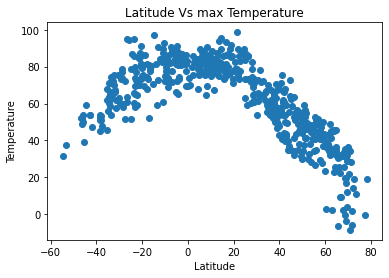

There is a close grouping of temperature depending on the latitude. It seems like a form of quadratic function.


In [7]:
lvt_x = clean_df['Latitude']
lvt_y = clean_df['Max Temperature']

# Create Plot
plt.scatter(lvt_x,lvt_y)

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.title('Latitude Vs max Temperature')

# Show plot
plt.savefig("Output/lvt.png")
plt.show()

print('There is a close grouping of temperature depending on the latitude. It seems like a form of quadratic function.')

## Latitude vs. Humidity Plot

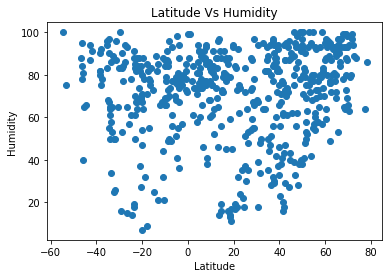

It does not look like there is any strong correlation between humidity and latitude


In [8]:
hum_x = clean_df['Latitude']
hum_y = clean_df['Humidity']

# Create Plot
plt.scatter(hum_x,hum_y)

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Latitude Vs Humidity')

# Show plot
plt.savefig("Output/hum.png")
plt.show()

print("It does not look like there is any strong correlation between humidity and latitude")

## Latitude vs. Cloudiness Plot

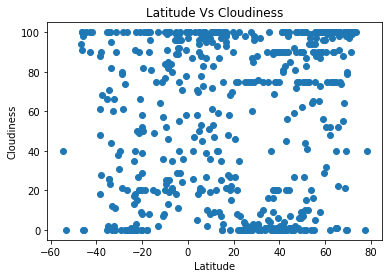

It does not look like there is any strong correlation between cloudiness and latitude


In [9]:
cloud_x = clean_df['Latitude']
cloud_y = clean_df['Cloudiness']

# Create Plot
plt.scatter(cloud_x,cloud_y)

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Latitude Vs Cloudiness')


# Show plot
plt.savefig("Output/cloud.png")
plt.show()

print("It does not look like there is any strong correlation between cloudiness and latitude")

## Latitude vs. Wind Speed Plot

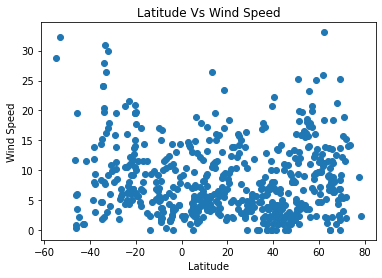

It does not look like there is any strong correlation between wind speed and latitude


In [10]:
windspeed_x = clean_df['Latitude']
windspeed_y = clean_df['Wind Speed']

# Create Plot
plt.scatter(windspeed_x,windspeed_y)

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Latitude Vs Wind Speed')

# Show plot
plt.savefig("Output/windspeed.png")
plt.show()

print("It does not look like there is any strong correlation between wind speed and latitude")

## Linear Regression

In [11]:
south_df = clean_df.loc[clean_df['Latitude']<0]
north_df = clean_df.loc[clean_df['Latitude']>0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

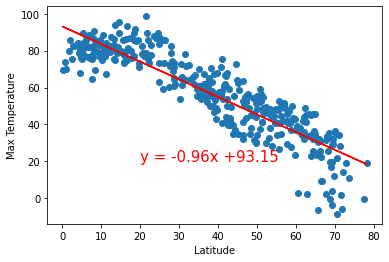

The r-value is: 0.8
There is a good linear correlation between latitude and max temperature in the northern hemisphere


In [12]:
maxtemp_nh_x = north_df['Latitude']
maxtemp_nh_y = north_df['Max Temperature']

# Perform a linear regression on temperature vs. latitude
(maxtemp_nh_slope, maxtemp_nh_intercept, maxtemp_nh_rvalue, maxtemp_nh_pvalue, maxtemp_nh_stderr) = stats.linregress(maxtemp_nh_x, maxtemp_nh_y)

# Regression Fomula
maxtemp_nh_regress_values = maxtemp_nh_x * maxtemp_nh_slope + maxtemp_nh_intercept

# Create line equation string
maxtemp_nh_line_eq = "y = " + str(round(maxtemp_nh_slope,2)) + "x +" + str(round(maxtemp_nh_intercept,2))

# Create Plot
plt.scatter(maxtemp_nh_x,maxtemp_nh_y)
plt.plot(maxtemp_nh_x,maxtemp_nh_regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.annotate(maxtemp_nh_line_eq,(20,20),fontsize=15,color="red")

# Show plot
plt.savefig("Output/maxtemp_nh.png")
plt.show()

# Print r value
print(f"The r-value is: {round(maxtemp_nh_rvalue**2,2)}")
print(f'There is a good linear correlation between latitude and max temperature in the northern hemisphere')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

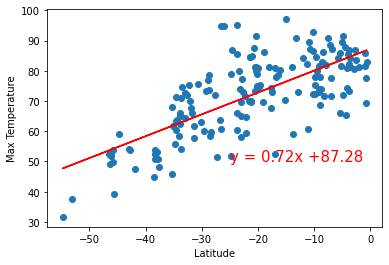

The r-value is: 0.51
There is a relatively good linear correlation between latitude and max temperature in the southern hemisphere, though not as good as the northern hemisphere data


In [13]:
maxtemp_sh_x = south_df['Latitude']
maxtemp_sh_y = south_df['Max Temperature']

# Perform a linear regression on temperature vs. latitude
(maxtemp_sh_slope, maxtemp_sh_intercept, maxtemp_sh_rvalue, maxtemp_sh_pvalue, maxtemp_sh_stderr) = stats.linregress(maxtemp_sh_x, maxtemp_sh_y)

# Regression Fomula
maxtemp_sh_regress_values = maxtemp_sh_x * maxtemp_sh_slope + maxtemp_sh_intercept

# Create line equation string
maxtemp_sh_line_eq = "y = " + str(round(maxtemp_sh_slope,2)) + "x +" + str(round(maxtemp_sh_intercept,2))

# Create Plot
plt.scatter(maxtemp_sh_x,maxtemp_sh_y)
plt.plot(maxtemp_sh_x,maxtemp_sh_regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.annotate(maxtemp_sh_line_eq,(-25,50),fontsize=15,color="red")

# Show plot
plt.savefig("Output/maxtemp_sh.png")
plt.show()

# Print r value
print(f"The r-value is: {round(maxtemp_sh_rvalue**2,2)}")
print(f'There is a relatively good linear correlation between latitude and max temperature in the southern hemisphere, though not as good as the northern hemisphere data')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

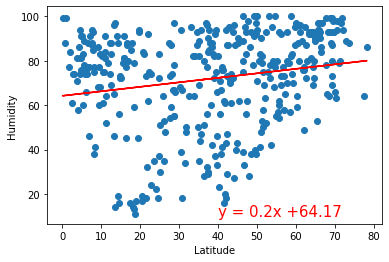

The r-value is: 0.04
There is no correlation in this set of data.


In [14]:
hum_nh_x = north_df['Latitude']
hum_nh_y = north_df['Humidity']

# Perform a linear regression on temperature vs. latitude
(hum_nh_slope, hum_nh_intercept, hum_nh_rvalue, hum_nh_pvalue, hum_nh_stderr) = stats.linregress(hum_nh_x, hum_nh_y)

# Regression Fomula
hum_nh_regress_values = hum_nh_x * hum_nh_slope + hum_nh_intercept

# Create line equation string
hum_nh_line_eq = "y = " + str(round(hum_nh_slope,2)) + "x +" + str(round(hum_nh_intercept,2))

# Create Plot
plt.scatter(hum_nh_x,hum_nh_y)
plt.plot(hum_nh_x,hum_nh_regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(hum_nh_line_eq,(40,10),fontsize=15,color="red")

# Show plot
plt.savefig("Output/hum_nh.png")
plt.show()

# Print r value
print(f"The r-value is: {round(hum_nh_rvalue**2,2)}")
print('There is no correlation in this set of data.')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

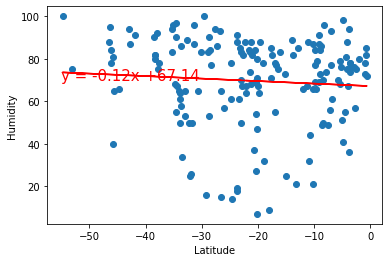

The r-value is: 0.01
There is no correlation in this set of data.


In [15]:
hum_sh_x = south_df['Latitude']
hum_sh_y = south_df['Humidity']

# Perform a linear regression on temperature vs. latitude
(hum_sh_slope, hum_sh_intercept, hum_sh_rvalue, hum_sh_pvalue, hum_sh_stderr) = stats.linregress(hum_sh_x, hum_sh_y)

# Regression Fomula
hum_sh_regress_values = hum_sh_x * hum_sh_slope + hum_sh_intercept

# Create line equation string
hum_sh_line_eq = "y = " + str(round(hum_sh_slope,2)) + "x +" + str(round(hum_sh_intercept,2))

# Create Plot
plt.scatter(hum_sh_x,hum_sh_y)
plt.plot(hum_sh_x,hum_sh_regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(hum_sh_line_eq,(-55,70),fontsize=15,color="red")

# Show plot
plt.savefig("Output/hum_sh.png")
plt.show()

# Print r value
print(f"The r-value is: {round(hum_sh_rvalue**2,2)}")
print('There is no correlation in this set of data.')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

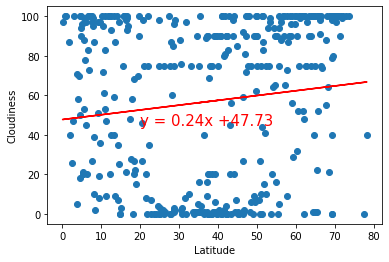

The r-value is: 0.02
There is no correlation in this set of data.


In [16]:
cloud_nh_x = north_df['Latitude']
cloud_nh_y = north_df['Cloudiness']

# Perform a linear regression on temperature vs. latitude
(cloud_nh_slope, cloud_nh_intercept, cloud_nh_rvalue, cloud_nh_pvalue, cloud_nh_stderr) = stats.linregress(cloud_nh_x, cloud_nh_y)

# Regression Fomula
cloud_nh_regress_values = cloud_nh_x * cloud_nh_slope + cloud_nh_intercept

# Create line equation string
cloud_nh_line_eq = "y = " + str(round(cloud_nh_slope,2)) + "x +" + str(round(cloud_nh_intercept,2))

# Create Plot
plt.scatter(cloud_nh_x,cloud_nh_y)
plt.plot(cloud_nh_x,cloud_nh_regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(cloud_nh_line_eq,(20,45),fontsize=15,color="red")

# Show plot
plt.savefig("Output/cloud_nh.png")
plt.show()

# Print r value
print(f"The r-value is: {round(cloud_nh_rvalue**2,2)}")
print('There is no correlation in this set of data.')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

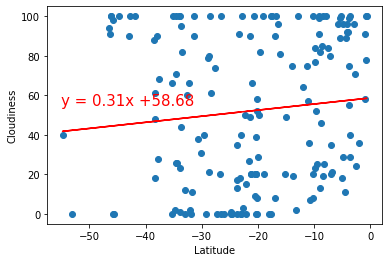

The r-value is: 0.01
There is no correlation in this set of data.


In [17]:
cloud_sh_x = south_df['Latitude']
cloud_sh_y = south_df['Cloudiness']

# Perform a linear regression on temperature vs. latitude
(cloud_sh_slope, cloud_sh_intercept, cloud_sh_rvalue, cloud_sh_pvalue, cloud_sh_stderr) = stats.linregress(cloud_sh_x, cloud_sh_y)

# Regression Fomula
cloud_sh_regress_values = cloud_sh_x * cloud_sh_slope + cloud_sh_intercept

# Create line equation string
cloud_sh_line_eq = "y = " + str(round(cloud_sh_slope,2)) + "x +" + str(round(cloud_sh_intercept,2))

# Create Plot
plt.scatter(cloud_sh_x,cloud_sh_y)
plt.plot(cloud_sh_x,cloud_sh_regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(cloud_sh_line_eq,(-55,55),fontsize=15,color="red")

# Show plot
plt.savefig("Output/cloud_sh.png")
plt.show()

# Print r value
print(f"The r-value is: {round(cloud_sh_rvalue**2,2)}")
print('There is no correlation in this set of data.')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

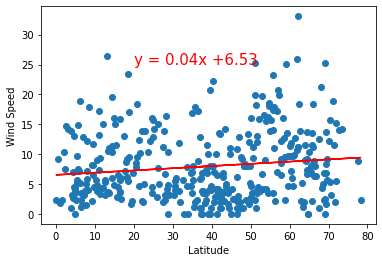

The r-value is: 0.02
There is no correlation in this set of data.


In [18]:
windspeed_nh_x = north_df['Latitude']
windspeed_nh_y = north_df['Wind Speed']

# Perform a linear regression on temperature vs. latitude
(windspeed_nh_slope, windspeed_nh_intercept, windspeed_nh_rvalue, windspeed_nh_pvalue, windspeed_nh_stderr) = stats.linregress(windspeed_nh_x, windspeed_nh_y)

# Regression Fomula
windspeed_nh_regress_values = windspeed_nh_x * windspeed_nh_slope + windspeed_nh_intercept

# Create line equation string
windspeed_nh_line_eq = "y = " + str(round(windspeed_nh_slope,2)) + "x +" + str(round(windspeed_nh_intercept,2))

# Create Plot
plt.scatter(windspeed_nh_x,windspeed_nh_y)
plt.plot(windspeed_nh_x,windspeed_nh_regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(windspeed_nh_line_eq,(20,25),fontsize=15,color="red")

# Show plot
plt.savefig("Output/windspeed_nh.png")
plt.show()

# Print r value
print(f"The r-value is: {round(windspeed_nh_rvalue**2,2)}")
print('There is no correlation in this set of data.')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

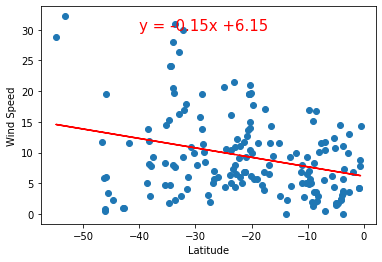

The r-value is: 0.09
There is no correlation in this set of data.


In [19]:
windspeed_sh_x = south_df['Latitude']
windspeed_sh_y = south_df['Wind Speed']

# Perform a linear regression on temperature vs. latitude
(windspeed_sh_slope, windspeed_sh_intercept, windspeed_sh_rvalue, windspeed_sh_pvalue, windspeed_sh_stderr) = stats.linregress(windspeed_sh_x, windspeed_sh_y)

# Regression Fomula
windspeed_sh_regress_values = windspeed_sh_x * windspeed_sh_slope + windspeed_sh_intercept

# Create line equation string
windspeed_sh_line_eq = "y = " + str(round(windspeed_sh_slope,2)) + "x +" + str(round(windspeed_sh_intercept,2))

# Create Plot
plt.scatter(windspeed_sh_x,windspeed_sh_y)
plt.plot(windspeed_sh_x,windspeed_sh_regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(windspeed_sh_line_eq,(-40,30),fontsize=15,color="red")

# Show plot
plt.savefig("Output/windspeed_sh.png")
plt.show()

# Print r value
print(f"The r-value is: {round(windspeed_sh_rvalue**2,2)}")
print('There is no correlation in this set of data.')

In [20]:
print('Final Conclusion')
print('- Temperature have a relatively strong correlation to the latitude of the City')
print('- For the correlation between temperature and latitude, it appears that theere is a stronger correlation in the northern hemisphere when compared to the southern hemisphere')
print('- Humidity, Cloudiness & Wind speed does not appear to have any correlation to the latitude of the city.')

Final Conclusion
- Temperature have a relatively strong correlation to the latitude of the City
- For the correlation between temperature and latitude, it appears that theere is a stronger correlation in the northern hemisphere when compared to the southern hemisphere
- Humidity, Cloudiness & Wind speed does not appear to have any correlation to the latitude of the city.
